<h1 style="text-align: center;">Frequency Response</h1>
<p style="text-align: center;">Lab 10</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with frequency response tools and Bode plots using Python.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Bode plot for **Part 1, Task 1**.  
[ ] Bode plot for **Part 1, Task 2**.  
[ ] Bode plot for **Part 1, Task 3**.  
##### Part 2  
[ ] Time-domain plot for **Part 2, Task 1**.  
[ ] Code for **Part 2, Task 2**.  
[ ] Code for **Part 2, Task 3**. 
[ ] Time-domain plot for **Part 2, Task 4**.

### 3. Part 1
##### 3.0.1 Example Code
The following code shows how to use the **control.TransferFunction()** and **control.bode()** methods. Consult the documentation for further usage if necessary. 

In [ ]:
""" This code is non-functioning, it serves to show syntax for the control.TransferFunction() and control.bode() functions. """

#import control as con #This package is not included in Anaconda and should have been installed in lab 0

#sys = con.TransferFunction(num, den) #S-domain numerator and denominator similar to scipy.signal functions we have used before
#_ = con.bode(sys, omega, dB=True, Hz=True, deg=True, Plot=True) #Use _ to suppress the output, this will still plot because of the Plot=True parameter

##### 3.1 Purpose  
Develop a frequency response from the RLC circuit from **Prelab 10** and present the model using Bode plots.  

##### 3.2 Tasks  
Consider the RLC circuit from **Prelab 10**, which has the values R = 1 k$\Omega$, L = 27 mH, C = 100 nF and has the transfer function, $$H(s) = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}.$$  
1. Use the expressions found in the prelab to plot the magnitude (in dB) and the phase (in degrees) in Python for the RLC transfer function $H(s)$ from $10^3 \ \frac{rad}{s} \le \omega \le 10^6 \ \frac{rad}{s}$ using an adequately small step size. Use **matplotlib.pyplot.semilogx()** instead of **matplotlib.pyplot.plot()** to plot the x-axis on a logarithmic scale. *Note: You may need to adjust part of the phase by $\pi$ radians to match your results in this task.*

In [20]:
import control as con
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

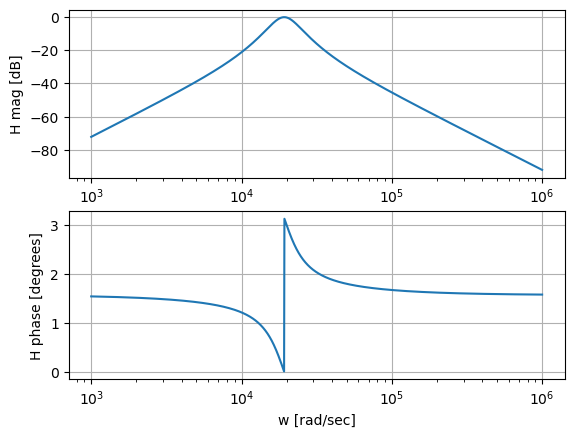

In [22]:
steps = 1e2
w = np.arange(1e3, 1e6 + steps, steps)
R = 1e3
L = 27e-3
C = 100e-9
H_mag = 20*np.log((w/(R*C))/np.sqrt(w**4+((1/(R*C))**2-(2/(L*C)))*w**2+(1/(L*C))**2))
H_phase = np.pi/2-np.arctan((w/(R*C))/(-(w**2)+(1/(L*C))))

plt.figure()
plt.subplot(2,1,1)
plt.semilogx(w, H_mag)
plt.grid()
plt.ylabel("H mag [dB]")
plt.xlabel("w [rad/sec]")
plt.subplot(2,1,2)
plt.semilogx(w, H_phase)
plt.grid()
plt.ylabel("H phase [degrees]")
plt.xlabel("w [rad/sec]")
plt.show()

2. Use **scipy.signal.bode()** to plot the magnitude and phase frequency response for the RLC transfer function. Check that the plots generated using your hand-derived magnitude and phase match the Bode plot. 

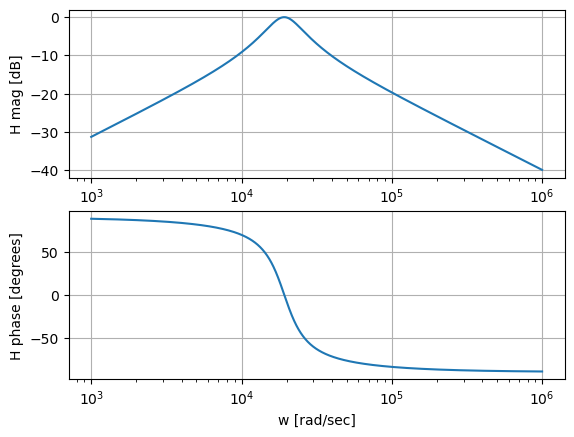

In [42]:
steps = 1e2
omega = np.arange(1e3, 1e6 + steps, steps)
R = 1e3
L = 27e-3
C = 100e-9
num = [1/(R*C), 0]
den = [1, 1/(R*C), 1/(L*C)]
sys = sig.TransferFunction(num, den)
w, H_mag, H_phase = sig.bode(sys, omega)

plt.figure()
plt.subplot(2,1,1)
plt.semilogx(w, H_mag)
plt.grid()
plt.ylabel("H mag [dB]")
plt.xlabel("w [rad/sec]")
plt.subplot(2,1,2)
plt.semilogx(w, H_phase)
plt.grid()
plt.ylabel("H phase [degrees]")
plt.xlabel("w [rad/sec]")
plt.show()

3. In most engineering situations, it may be desirable to find the frequency response with respect to Hz, not rad/s. We may also want to set the specific range of frequencies over which to plot the frequency. Print the transfer function after using **control.TransferFunction()**. Plot the frequency response of the system in Hz using **control.bode()** and following the example code given earlier in the lab. 

C:\Users\gjsta\anaconda3\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


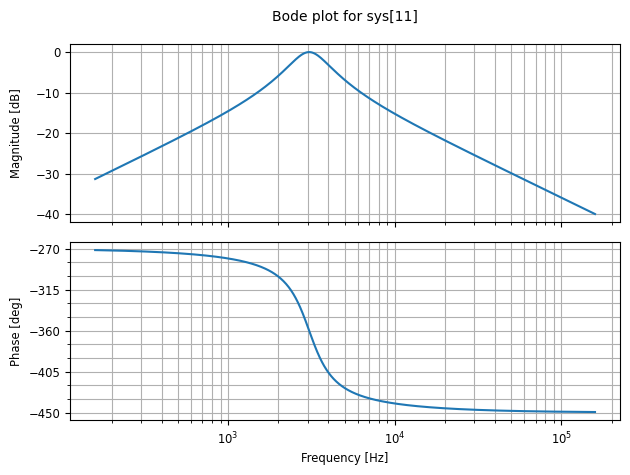

In [48]:
steps = 1e2
omega = np.arange(1e3, 1e6 + steps, steps)
R = 1e3
L = 27e-3
C = 100e-9
num = [1/(R*C), 0]
den = [1, 1/(R*C), 1/(L*C)]
sys = con.TransferFunction(num, den)
_ = con.bode(sys, omega, dB=True, Hz=True, deg=True, plot=True)

### 4. Part 2  
##### 4.1 Purpose
Use the frequency response model developed in **Part 1** as a filter for a multi-band input signal.

##### 4.2 Tasks  
1. Plot the signal, $$x(t) = \cos(2\pi\cdot100t) + \cos(2\pi\cdot3024t) + \sin(2\pi\cdot50000t)$$ from $0 \le t \le 0.01$ s, setting the sampling frequency high enough to capture all three frequencies and the step size of $\frac{1}{f_s}$.

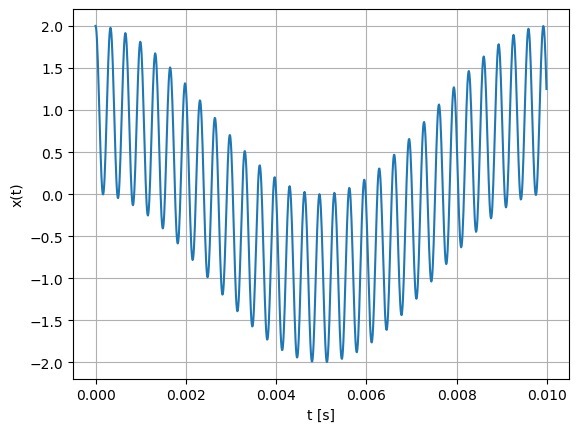

In [52]:
fs = 2*50000
steps = 1/fs
t = np.arange(0, 0.01, steps)
x = np.cos(2*np.pi*100*t)+np.cos(2*np.pi*3024*t)+np.sin(2*np.pi*50000*t)

plt.figure()
plt.plot(t, x)
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t [s]")
plt.show()

2. To pass the input signal $x(t)$ through the RLC circuit, the transfer function must be converter into its z-domain equivalent. This can be done automatically by Python using **scipy.signal.bilinear()**. *Note: You will be responsible for looking up the documentation on how to use this function.*

In [54]:
R = 1e3
L = 27e-3
C = 100e-9
num = [1/(R*C), 0]
den = [1, 1/(R*C), 1/(L*C)]
numz, denz = sig.bilinear(num, den, fs)

3. Use **scipy.signal.lfilter()** to pass the input signal through the filter. Since your output will be a large array, there is no need to print the output.

In [58]:
y = sig.lfilter(numz, denz, x)

4. Plot the output signal $y(t)$ over the same time period as **Part 2 Task 1**.

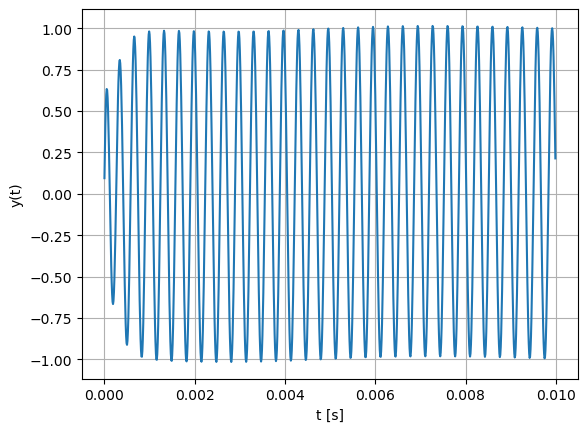

In [61]:
plt.figure()
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.show()

### 5. Questions
1. Explain how the filter and filtered output in **Part 2** makes sense given the Bode plots from **Part 1**. Discuss how the filter modifies specific frequency bands, in Hz. 
>Based on the the bode plots from part 1, it seems to look like a bandpass filter. Meaning that the functions with a frequency of 100 and 50000 Hz get filtered out, leaving only the cosine function at 3024 Hz.
2. Discuss the purpose and workings of **scipy.signal.bilinear()** and **scipy.signal.lfilter()**. 
>sig.bilinear converts the transfer function from the s-domain to the z-domain. sig.lfilter runs a function x(t) through a filter (transfer function).
3. What happens if you use a different sampling frequency in **scipy.signal.bilinear()** than you used for the time-domain signal?
>A higher frequency would create unecessary work for the code to calculate for since the functions do not run any higher than that. Whereas a lower frequency would exclude some of the functions with higher frequencies from the final output.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>This lab was clear and concise.